### Unsupervised Learning Approach using Doc2vec vectors as features.

####  Converting docs of cleaned corpus of News Articles into vector form

In [1]:
#Import all the dependencies
import gensim,os
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join

docLabels = []
docLabels = [f for f in listdir(r"C:\Users\PUSHPENDRA\Desktop\Acads\Autumn 2017-18\snlp\open data\Corpus") 
             if f.endswith(".txt")]
#create a list data that stores the content of all text files in order of their names in docLabels
data = []
for doc in docLabels:
    data.append(open(os.path.join(r"C:\Users\PUSHPENDRA\Desktop\Acads\Autumn 2017-18\snlp\open data\Corpus", doc)).read())


C:\Users\PUSHPENDRA\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from gensim.models.doc2vec import TaggedDocument
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(doc.split(),[self.labels_list[idx]])

#iterator returned over all documents
it = LabeledLineSentence(data, docLabels)

In [3]:
model = gensim.models.Doc2Vec(size=300, min_count=0, alpha=0.025, min_alpha=0.025)
model.build_vocab(it)
#training of model
for epoch in range(10):
    print('iteration' +str(epoch+1))
    model.train(it,total_examples=model.corpus_count,epochs=model.iter)
    model.alpha -= 0.002
    model.min_alpha = model.alpha
    model.train(it,total_examples=model.corpus_count,epochs=model.iter)
#saving the created model
print("Iteration Completed")

iteration1
iteration2
iteration3
iteration4
iteration5
iteration6
iteration7
iteration8
iteration9
iteration10
Iteration Completed


In [4]:
#loading the model
from sklearn.metrics.pairwise import cosine_similarity
model.save("doc2vec.model")
d2v_model = gensim.models.doc2vec.Doc2Vec.load('doc2vec.model')
print("model saved")

model saved


#### Unsupervised Learning Algorithms on doc2vec vectors as features.

In [5]:
import pandas as pd 
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression as logreg
from sklearn import metrics
news=pd.read_csv(r"C:\Users\PUSHPENDRA\Desktop\Acads\Autumn 2017-18\snlp\open data\Exaggeration_new.csv")
d2v_model = gensim.models.doc2vec.Doc2Vec.load('doc2vec.model')
i=0
feature=np.zeros(shape=(652,300))
feature_all=np.zeros(shape=(652,600))
for index,file in news.iterrows():
        press=file[0][:6]+'0'+file[0][8:]+".txt"
        newsarticle=file[0][:6]+'0'+file[0][8:]+"_"+file[1]+".txt"
       
        docvec = d2v_model.docvecs[press]#if string tag used in training
        docvec1= d2v_model.docvecs[newsarticle]
        tot=np.concatenate((docvec,docvec1))
        feature[i]=docvec1.T
        feature_all[i]=tot.T
    
        
        
        i=i+1

feature_df=pd.DataFrame(feature)
feature_all_df=pd.DataFrame(feature_all)


In [ ]:
import pandas as pd 
import csv
feature=pd.read_csv(r"/home/pushpendra/Documents/open data /feature.csv")
feature_all=pd.read_csv(r"/home/pushpendra/Documents/open data /feature_all.csv")
feature=feature.as_matrix(columns=None)
feature_all=feature_all.as_matrix(columns=None)
feature_all.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster

import time
import pandas as pd
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
dat=pd.read_csv(r"/home/pushpendra/Documents/open data /Exaggeration_new.csv")

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.

kmeans = KMeans(n_clusters=2,random_state=0).fit(feature)

In [21]:
def purity_score(y_true, y_pred):
    # matrix which will hold the majority-voted labels
    y_labeled_voted = np.zeros(y_true.shape)
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that 
    # we count the actual occurence of classes between two consecutive bin
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_labeled_voted[y_pred==cluster] = winner

    return metrics.accuracy_score(y_true, y_labeled_voted)

In [25]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    flatui = ["red", "blue", "yellow", "green"]
    palette = sns.color_palette(flatui, np.unique(labels).max() + 1)
    
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis()
    frame.axes.get_yaxis()
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    #print("classification_report :")
    #print( metrics.classification_report(y_true=dat['Exaggeration'],y_pred=labels) )
    #print(metrics.accuracy_score(y_true=dat['Exaggeration'],y_pred=labels))
    #print("Purity:")
    print(purity_score(dat['Exaggeration'],labels))
    return 

data =feature

0.538343558282
0.579754601227
0.549079754601
0.576687116564
0.570552147239
0.599693251534
0.578220858896
0.556748466258
0.60736196319


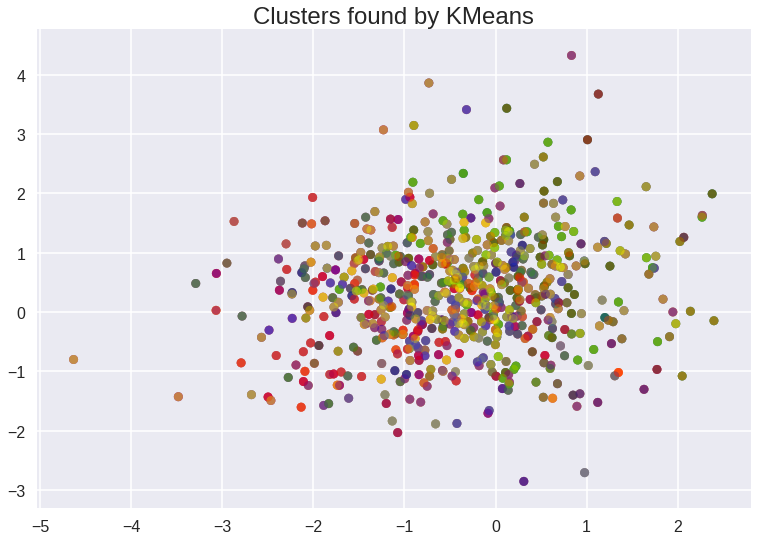

In [26]:
k=[2,3,4,5,6,7,8,9,10]
for ncluster in k:
    plot_clusters(data, cluster.KMeans, (), {'n_clusters':ncluster})
    

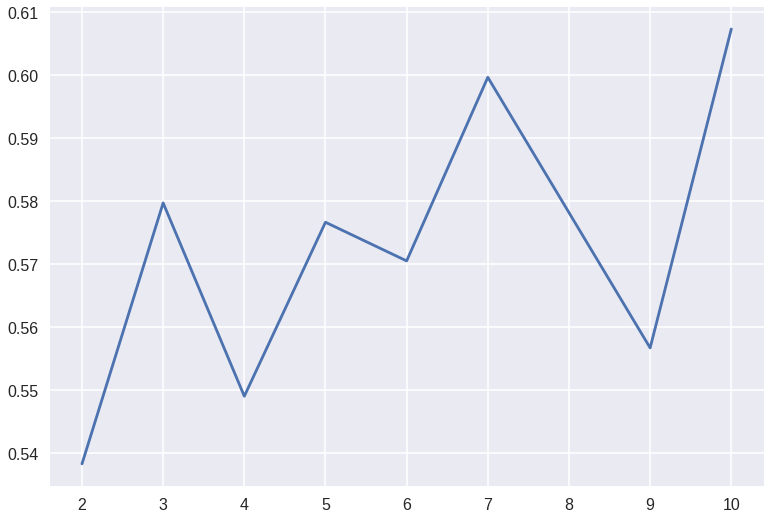

In [28]:
purity=[0.5383435583,0.5797546012,0.5490797546,0.5766871166,0.5705521472,0.5996932515,0.5782208589,0.5567484663,0.6073619632]
plt.plot(k,purity)

classification_report :
             precision    recall  f1-score   support

          0       0.54      0.52      0.53       318
          1       0.56      0.58      0.57       334

avg / total       0.55      0.55      0.55       652

0.549079754601
Purity:
0.549079754601227


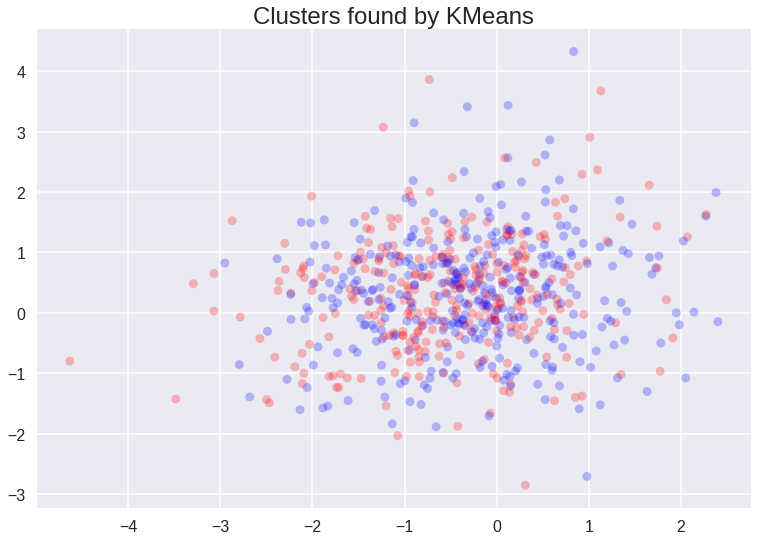

In [56]:
data=feature
plot=plot_clusters(data, cluster.KMeans, (), {'n_clusters':2})
plot.savefig(r'/home/pushpendra/Documents/open data /kmeans1.jpeg')